In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from itertools import combinations

In [2]:
class AllPairs:
    """
    Esta clase representa una variable aleatoria sobre el conjunto de 
    posibles respuestas de realizar todas las comparaciones posibles en
    un array de 'N' elementos.
    """
    def __init__(self, N):
        self.generador = [i for i in range(N)]
        self.N_bits = N*(N-1)/2
        self.entropy_theo = np.log2(np.math.factorial(N))
        
    def rand(self, binario=False):
        """
        Esta función genera un número aleatorio que sigue esta distribución.
        """
        aux = np.random.permutation(self.generador)
        result=''
        for i,j in combinations(aux,2):
            if i>j:
                result+='0'
            else:
                result+='1'
        if binario:
            return int(result,2),result
        else:
            return int(result,2)
        
    def hist(self, n):
        aux=[]
        for i in range(n):
            aux.append(self.rand())
        hist = np.histogram(aux, bins=int(2**a.N_bits), range=(0,2**a.N_bits))
        return [hist[1][i] for i in range(len(hist[1])-1)],hist[0]
    
    def entropy(self, n):
        data=[]
        for i in range(n):
            data.append(self.rand())
        val,counts = np.unique(data, return_counts=True)
        return sp.entropy(counts, base=2)
        

In [3]:
class NmenosUno:
    """
    Esta clase representa una variable aleatoria sobre el conjunto de 
    posibles respuestas de realizar todas las comparaciones posibles en
    un array de 'N' elementos.
    """
    def __init__(self, N):
        self.generador = [i for i in range(N)]
        self.N_bits = N-1
        
    def rand(self, binario=False):
        """
        Esta función genera un número aleatorio que sigue esta distribución.
        """
        aux = np.random.permutation(self.generador)
        result=''
        for i in range(len(aux)-1):
            if aux[i+1]>aux[i]:
                result+='0'
            else:
                result+='1'
        if binario:
            return int(result,2),result
        else:
            return int(result,2)
        
    def hist(self, n):
        aux=[]
        for i in range(n):
            aux.append(self.rand())
        hist = np.histogram(aux, bins=int(2**a.N_bits), range=(0,2**a.N_bits))
        return [hist[1][i] for i in range(len(hist[1])-1)],hist[0]
    
    def entropy(self, n):
        data=[]
        for i in range(n):
            data.append(self.rand())
        val,counts = np.unique(data, return_counts=True)
        return sp.entropy(counts, base=2)

In [4]:
def parse_bitwords(texto, l, binario=False):
    """
    Esta función toma un texto de símbolos binarios, y devuelve
    un vector con el texto separado en fragmentos de longitud 'l'
    en formato decimal (si binario=False), y por strings que
    representan al número en binario si binario=True.
    """
    result=[]
    for i in range(0,len(texto),l):
        result.append(''.join([texto[i:i+l]]))
    if not binario:
        for i,word in enumerate(result):
            result[i] = int(word,base=2)
    return result

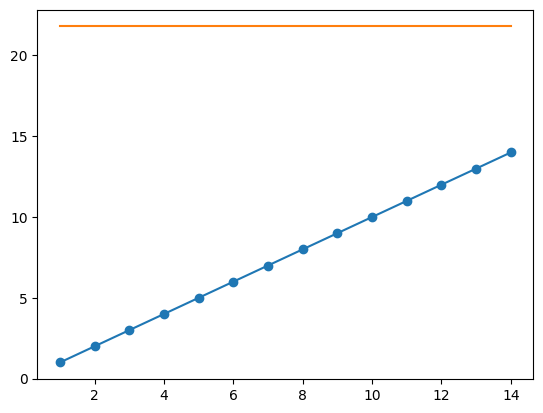

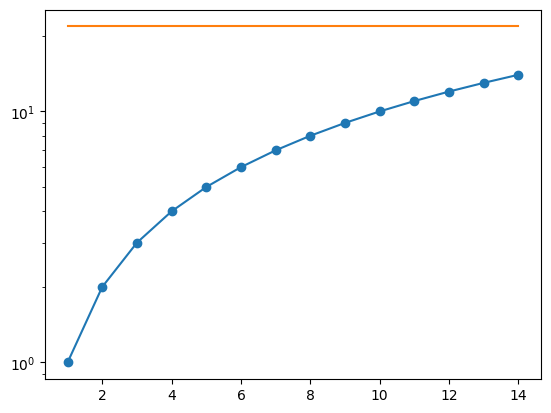

In [5]:
"""
Expeimento para estudiar cómo se aproxima la estimación de la entropía al valor 
teórico en función del número de muestras utilizadas para el histograma.
"""

a=AllPairs(10)
x=[]
y=[]
for n in range(1, 15, 1):
    x.append(n)
    y.append(a.entropy(2**n))
    
plt.plot(x,y, '-o')
plt.plot([min(x), max(x)], [a.entropy_theo, a.entropy_theo])
plt.show()

plt.plot(x,y, '-o')
plt.yscale('log')
plt.plot([min(x), max(x)], [a.entropy_theo, a.entropy_theo])
plt.show()

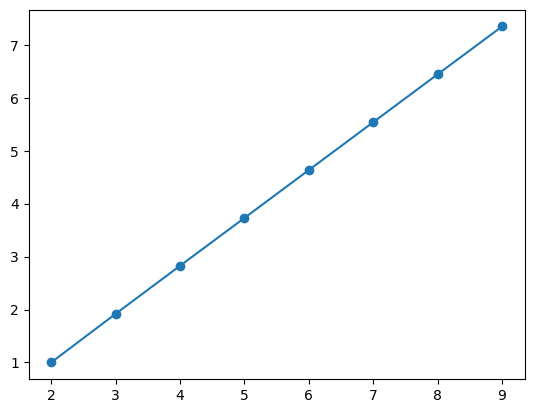

In [6]:
"""
Entropía de la topología 'N-1' en función del número de anillos.
"""
x=[]
y=[]
for n in range(2, 10, 1):
    a = NmenosUno(n)
    x.append(n)
    y.append(a.entropy(1000000))
    
plt.plot(x,y, '-o')
plt.show()

In [7]:
sp.linregress(x,y)

LinregressResult(slope=0.906008907972403, intercept=-0.8033209108630066, rvalue=0.999998014809622, pvalue=1.9558963971238176e-17, stderr=0.0007370103176943156, intercept_stderr=0.00439124576831787)